# Session 5: The Energy Oracle (Ensemble Learning)
**Objective**: Apply ensemble learning techniques (Bagging & Boosting) to improve prediction accuracy.

## Task 2: Models
We will compare:
1. **Random Forest** (Bagging)
2. **AdaBoost** (Boosting)
3. **Gradient Boosting** (Boosting)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, f1_score, accuracy_score

sns.set_theme(style="whitegrid")


In [2]:
# Load Data
df = pd.read_csv('../data/ai4i2020.csv')

features = ['Rotational speed [rpm]', 'Process temperature [K]', 'Torque [Nm]', 'Tool wear [min]']
target = 'Machine failure'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Data Split:", X_train.shape, X_test.shape)


Data Split: (8000, 4) (2000, 4)


## Task 3: Random Forest (Bagging)
Training a Random Forest Classifier.


In [3]:
# 1. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

f1_rf = f1_score(y_test, y_pred_rf)
print(f"Random Forest F1-Score: {f1_rf:.4f}")
print(classification_report(y_test, y_pred_rf))


Random Forest F1-Score: 0.4800
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1932
           1       0.75      0.35      0.48        68

    accuracy                           0.97      2000
   macro avg       0.86      0.67      0.73      2000
weighted avg       0.97      0.97      0.97      2000



## Task 4: Boosting Models
Experimenting with AdaBoost and Gradient Boosting.


In [4]:
# 2. AdaBoost
ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

# 3. Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print(f"AdaBoost F1-Score: {f1_score(y_test, y_pred_ada):.4f}")
print(f"Gradient Boosting F1-Score: {f1_score(y_test, y_pred_gb):.4f}")


AdaBoost F1-Score: 0.4528
Gradient Boosting F1-Score: 0.5200


## Task 5: Model Comparison & Conclusion
Comparing the performance of all three ensemble methods.


C:\Users\Vishnu\AppData\Local\Temp\ipykernel_42856\2501462214.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=f1_scores, palette='magma')


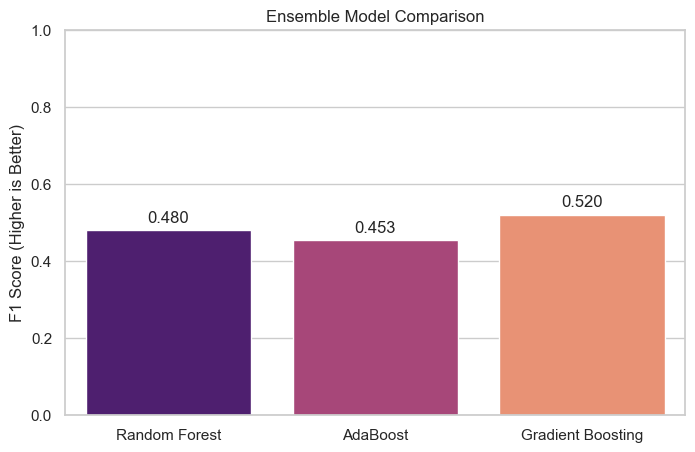

In [5]:
# Visualization
models = ['Random Forest', 'AdaBoost', 'Gradient Boosting']
f1_scores = [f1_score(y_test, y_pred_rf), f1_score(y_test, y_pred_ada), f1_score(y_test, y_pred_gb)]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=f1_scores, palette='magma')
plt.ylabel('F1 Score (Higher is Better)')
plt.title('Ensemble Model Comparison')
plt.ylim(0, 1)
for i, v in enumerate(f1_scores):
    plt.text(i, v + 0.02, f"{v:.3f}", ha='center')
plt.show()


### Recommendation
- **Random Forest**: Generally robust and parallelizable (fast training). Often strictly better than simple bagging.
- **Gradient Boosting**: Often achieves highest accuracy but slower to train sequentially. Sensitive to noise.
- **AdaBoost**: Good baseline for boosting but often outperformed by Gradient Boosting/XGBoost.

**Verdict**: Use **Gradient Boosting** if accuracy is paramount and you can afford training time. Use **Random Forest** for a good balance of speed and performance.
